# Analyse de mon emploi du temps chez SUEZ Consulting

## Description générale

In [44]:
"""
Analyse de mon emploi du temps chez SUEZ Consulting

Ce notebook a pour objectif d'analyser et de visualiser les données de mon emploi du temps professionnel, extraites d'un fichier CSV. 
Les étapes principales incluent :
- L'importation et le nettoyage des données brutes,
- La transformation des types de données pour faciliter l'analyse,
- La séparation des catégories d'activités,
- L'affichage et la vérification des données traitées,
- La réalisation de calculs et de visualisations pour mieux comprendre la répartition de mon temps de travail.

Chaque cellule du notebook est commentée pour expliquer les opérations réalisées, afin d'assurer la reproductibilité et la compréhension du traitement des données.
"""

# Ce notebook commence par l'importation des bibliothèques nécessaires (pandas, numpy, matplotlib, etc.).
# Les données sont ensuite importées depuis un fichier CSV, puis nettoyées (suppression de colonnes inutiles, conversion des types, etc.).
# Les colonnes textuelles et catégorielles sont transformées pour faciliter l'analyse.
# Des affichages intermédiaires permettent de vérifier la bonne transformation des données.
# Enfin, des calculs et visualisations sont réalisés pour explorer et synthétiser l'emploi du temps.

"\nAnalyse de mon emploi du temps chez SUEZ Consulting\n\nCe notebook a pour objectif d'analyser et de visualiser les données de mon emploi du temps professionnel, extraites d'un fichier CSV. \nLes étapes principales incluent :\n- L'importation et le nettoyage des données brutes,\n- La transformation des types de données pour faciliter l'analyse,\n- La séparation des catégories d'activités,\n- L'affichage et la vérification des données traitées,\n- La réalisation de calculs et de visualisations pour mieux comprendre la répartition de mon temps de travail.\n\nChaque cellule du notebook est commentée pour expliquer les opérations réalisées, afin d'assurer la reproductibilité et la compréhension du traitement des données.\n"

## Etapes préliminaires

### Importations

In [45]:
# Importations nécessaires à l'analyse des données brutes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from IPython.display import display
from src.calculate_duration import calculate_duration

Affichage des graphiques au sein des blocs notebook

In [46]:
%matplotlib inline

Import des données

In [47]:
# Importer les données brutes CSV dans un DataFrame
dataFilePath = r"data\data_edt_brute.csv"
df = pd.read_csv(dataFilePath, sep=';', encoding='utf-8')

# SI besoin, afficher les premières lignes du DataFrame pour vérifier le chargement des données
display(df.head())

# Afficher les informations du DataFrame pour vérifier les types de données et la présence de valeurs manquantes
display(df.info())

,Objet,Début,Heure_Debut,Fin,Heure_Fin,Journée entière,Date de rappel,Heure du rappel,Catégories
0,Réunion Activité Etudes & Fibre,16/05/2025,08:30:00,16/05/2025,17:30:00,Faux,16/05/2025,08:15:00,VIE ENTREPRISE
1,Causerie Environnement : Déchets,07/04/2025,14:30:00,07/04/2025,15:00:00,Faux,07/04/2025,14:15:00,FORMATION
2,Modelisation Lié,25/03/2025,14:00:00,25/03/2025,15:00:00,Faux,25/03/2025,13:45:00,AEP LIE - modelo;AEP LIE - gestion projet
3,Férié,14/07/2025,00:00:00,15/07/2025,00:00:00,Vrai,13/07/2025,17:00:00,NaN
4,Férié,08/05/2025,00:00:00,09/05/2025,00:00:00,Vrai,07/05/2025,17:00:00,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Objet            80 non-null     object
 1   Début            80 non-null     object
 2   Heure_Debut      80 non-null     object
 3   Fin              80 non-null     object
 4   Heure_Fin        80 non-null     object
 5   Journée entière  80 non-null     object
 6   Date de rappel   80 non-null     object
 7   Heure du rappel  80 non-null     object
 8   Catégories       66 non-null     object
dtypes: object(9)
memory usage: 5.8+ KB


None

### Traitement des données pour les rendre utilisables

Nettoyage

In [48]:
# Supprimer les colonnes "Date de rappel" et "Heure du rappel"
df.drop(columns=['Date de rappel', 'Heure du rappel'], inplace=True)

String pour les parties textuelles

In [49]:
# Conversion de la colonne "Objet" en dtype string
df['Objet'] = df['Objet'].astype(str)

# Conversion de la colonne "Journée entière" en dtype string
df['Journée entière'] = df['Journée entière'].astype(str)

# Vérification de la conversion
# df.info()

Boolean pour les "journées entières"

In [50]:
# Lire avec un fonction if then else pour vérifier si chaque évènement est sur une journée entière ou non, en bouclant sur tous les évènement du df
df['Journée entière'] = df['Journée entière'].apply(lambda x: True if x.lower() == 'vrai' else False)

# Vérification de la conversion en Booléen
df.head()

,Objet,Début,Heure_Debut,Fin,Heure_Fin,Journée entière,Catégories
0,Réunion Activité Etudes & Fibre,16/05/2025,08:30:00,16/05/2025,17:30:00,False,VIE ENTREPRISE
1,Causerie Environnement : Déchets,07/04/2025,14:30:00,07/04/2025,15:00:00,False,FORMATION
2,Modelisation Lié,25/03/2025,14:00:00,25/03/2025,15:00:00,False,AEP LIE - modelo;AEP LIE - gestion projet
3,Férié,14/07/2025,00:00:00,15/07/2025,00:00:00,True,NaN
4,Férié,08/05/2025,00:00:00,09/05/2025,00:00:00,True,NaN


Datetime pour les dates et heures de début et de fin

In [51]:
# Conversion des colonnes "Heure_Debut" et "Heure_Fin" en type datetime.time
df['Heure_Debut'] = pd.to_datetime(df['Heure_Debut'], format='%H:%M:%S').dt.time
df['Heure_Fin'] = pd.to_datetime(df['Heure_Fin'], format='%H:%M:%S').dt.time

# Conversion des colonnes "Début" et "Fin" en type datetime.date
df['Début'] = pd.to_datetime(df['Début'], format='%d/%m/%Y').dt.date
df['Fin'] = pd.to_datetime(df['Fin'], format='%d/%m/%Y').dt.date

# Vérification de la conversion
df.head()

,Objet,Début,Heure_Debut,Fin,Heure_Fin,Journée entière,Catégories
0,Réunion Activité Etudes & Fibre,2025-05-16,08:30:00,2025-05-16,17:30:00,False,VIE ENTREPRISE
1,Causerie Environnement : Déchets,2025-04-07,14:30:00,2025-04-07,15:00:00,False,FORMATION
2,Modelisation Lié,2025-03-25,14:00:00,2025-03-25,15:00:00,False,AEP LIE - modelo;AEP LIE - gestion projet
3,Férié,2025-07-14,00:00:00,2025-07-15,00:00:00,True,NaN
4,Férié,2025-05-08,00:00:00,2025-05-09,00:00:00,True,NaN


Séparation des categories

In [52]:
# Séparation des données de la colonne "Catégories" en type liste, qui contient chaque catégorie sous forme de string
df['Catégories'] = df['Catégories'].apply(
	lambda x: x.split(';') if isinstance(x, str) and pd.notnull(x) else (x if isinstance(x, list) else [])
)

# Vérification de la séparation des catégories
# df.head()

### Affichage après traitement

In [53]:
# Affichage des premières lignes du DataFrame après les transformations
display(df.head(10))

,Objet,Début,Heure_Debut,Fin,Heure_Fin,Journée entière,Catégories
0,Réunion Activité Etudes & Fibre,2025-05-16,08:30:00,2025-05-16,17:30:00,False,[VIE ENTREPRISE]
1,Causerie Environnement : Déchets,2025-04-07,14:30:00,2025-04-07,15:00:00,False,[FORMATION]
2,Modelisation Lié,2025-03-25,14:00:00,2025-03-25,15:00:00,False,"[AEP LIE - modelo, AEP LIE - gestion projet]"
3,Férié,2025-07-14,00:00:00,2025-07-15,00:00:00,True,[]
4,Férié,2025-05-08,00:00:00,2025-05-09,00:00:00,True,[]
5,Férié,2025-05-01,00:00:00,2025-05-02,00:00:00,True,[]
6,Férié,2025-04-21,00:00:00,2025-04-22,00:00:00,True,[]
7,Ferié stagiaires,2025-06-09,00:00:00,2025-06-10,00:00:00,True,[]
8,Causerie Santé Sécurité : Les échelles,2025-03-18,11:00:00,2025-03-18,11:30:00,False,[FORMATION]
9,Point Schéma directeur SIE du Lié,2025-03-04,09:00:00,2025-03-04,10:00:00,False,[AEP LIE - distribution]


In [54]:
# Affichage détaillé des informations du DataFrame après les transformations
# Utilisation d'un mode verbeux et bien mis en forme pour une meilleure lisibilité
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Objet            80 non-null     object
 1   Début            80 non-null     object
 2   Heure_Debut      80 non-null     object
 3   Fin              80 non-null     object
 4   Heure_Fin        80 non-null     object
 5   Journée entière  80 non-null     bool  
 6   Catégories       80 non-null     object
dtypes: bool(1), object(6)
memory usage: 4.0+ KB


None

## Calculs

### Calcul de la durée des évènements

In [55]:
# Pour chaque ligne du DataFrame, calculer la durée de l'évènement en minutes
df['Durée'] = df.apply(lambda row: calculate_duration(row['Début'], row['Fin'], row['Heure_Debut'], row['Heure_Fin'], row['Journée entière']), axis=1)

# Afficher les premières lignes du DataFrame avec la nouvelle colonne "Durée"
display(df.head(10))


,Objet,Début,Heure_Debut,Fin,Heure_Fin,Journée entière,Catégories,Durée
0,Réunion Activité Etudes & Fibre,2025-05-16,08:30:00,2025-05-16,17:30:00,False,[VIE ENTREPRISE],540
1,Causerie Environnement : Déchets,2025-04-07,14:30:00,2025-04-07,15:00:00,False,[FORMATION],30
2,Modelisation Lié,2025-03-25,14:00:00,2025-03-25,15:00:00,False,"[AEP LIE - modelo, AEP LIE - gestion projet]",60
3,Férié,2025-07-14,00:00:00,2025-07-15,00:00:00,True,[],420
4,Férié,2025-05-08,00:00:00,2025-05-09,00:00:00,True,[],420
5,Férié,2025-05-01,00:00:00,2025-05-02,00:00:00,True,[],420
6,Férié,2025-04-21,00:00:00,2025-04-22,00:00:00,True,[],420
7,Ferié stagiaires,2025-06-09,00:00:00,2025-06-10,00:00:00,True,[],420
8,Causerie Santé Sécurité : Les échelles,2025-03-18,11:00:00,2025-03-18,11:30:00,False,[FORMATION],30
9,Point Schéma directeur SIE du Lié,2025-03-04,09:00:00,2025-03-04,10:00:00,False,[AEP LIE - distribution],60


### Somme des durées par catégories

In [56]:
### Pour chaque catégorie, calculer la durée totale des évènements

# Créer une liste pour stocker les résultats
category_duration_list = []

# Boucle sur chaque catégorie unique dans le DataFrame
for category in df['Catégories'].explode().unique():
    # Filtrer le DataFrame pour obtenir les lignes correspondant à la catégorie actuelle
    category_df = df[df['Catégories'].apply(lambda x: category in x)]
    
    # Calculer la durée totale pour cette catégorie
    total_duration = category_df['Durée'].sum()
    
    # Ajouter un dictionnaire à la liste des durées par catégorie
    category_duration_list.append({'Catégorie': category, 'Durée_totale': total_duration})

# Convertir les minutes en heures
for item in category_duration_list:
    item['Durée_totale'] = item['Durée_totale'] / 60  # Convertir les minutes en heures

# Créer le DataFrame à partir de la liste
categoryDurations = pd.DataFrame(category_duration_list)

# Afficher le DataFrame des durées par catégorie
display(categoryDurations)


,Catégorie,Durée_totale
0,VIE ENTREPRISE,14.50
1,FORMATION,7.00
2,AEP LIE - modelo,1.00
3,AEP LIE - gestion projet,4.75
4,NaN,0.00
5,AEP LIE - distribution,1.00
6,AEP LIE - diag territorial,82.00
7,DATA et CODE,3.00
8,AEP LIE - prospective,15.00
9,RAPPORT STAGE,12.00


## Visualisation des données

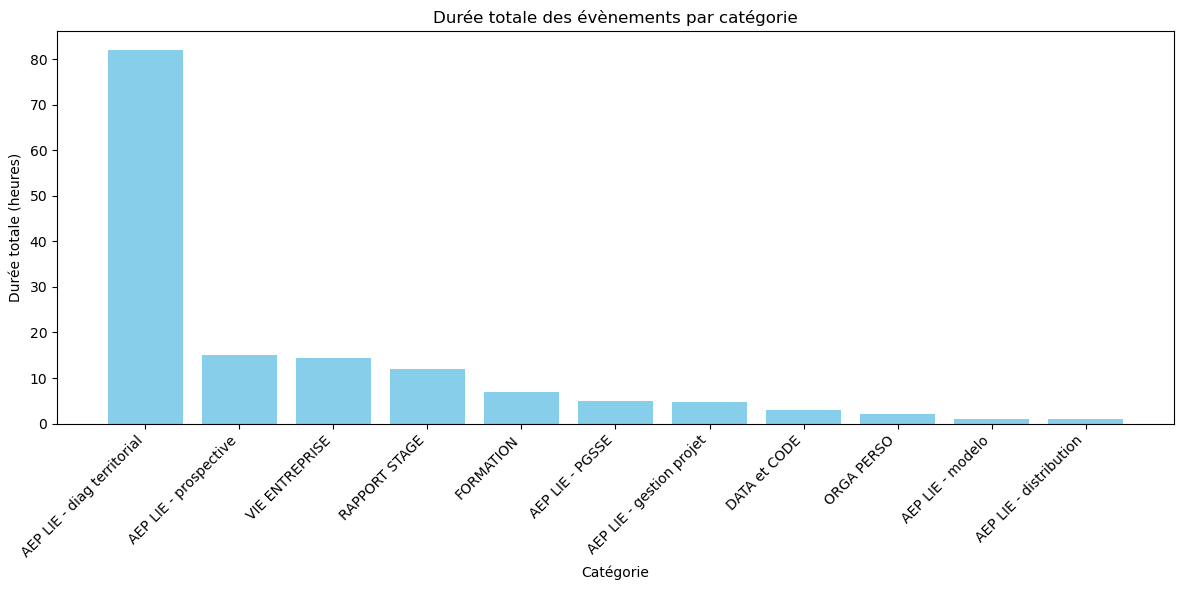

In [58]:
### Tracer un graphique à barres pour visualiser la durée totale par catégorie

# Supprimer les lignes où la catégorie est NaN
categoryDurations_plot = categoryDurations.dropna(subset=['Catégorie'])

# Classer les catégories par durée totale décroissante
categoryDurations_plot = categoryDurations_plot.sort_values(by='Durée_totale', ascending=False)

# Tracer le graphique à barres
plt.figure(figsize=(12, 6))
plt.bar(categoryDurations_plot['Catégorie'], categoryDurations_plot['Durée_totale'], color='skyblue')
plt.xlabel('Catégorie')
plt.ylabel('Durée totale (heures)')
plt.title('Durée totale des évènements par catégorie')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()